<h1> Car Accident Severity Predictor

<h4><u>Table of contents</h4>
<ul>
<li>Exploring the Dataset


We start by importing the relevant libraries and packages we'll be using in the Project!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import accuracy_score,f1_score,log_loss,classification_report,confusion_matrix,jaccard_similarity_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df=pd.read_csv("https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv")
df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<h3>Data Understanding

In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
severity_code=df['SEVERITYCODE'].values
severity_code

array([2, 1, 1, ..., 2, 2, 1])

As we see, the values of SEVERITYCODES are 1 and 2. These can be modified to 0 and 1 for a better model.
The next few cells perform this function

In [5]:
labels = preprocessing.LabelEncoder()
labels.fit([1, 2])
severity_code = labels.transform (severity_code)
severity_code
df ["SEVERITYCODE"] = severity_code

After modifying the severity code, let's understand the data better using the desribe method.

In [6]:
descriptive_stats= df.describe(include="all")
descriptive_stats

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
count,194673.000000,189339.000000,189339.000000,194673.000000,194673.000000,194673.000000,194673,194673,192747,65070.000000,...,189661,189503,4667,1.149360e+05,9333,194655,189769,194673.000000,1.946730e+05,194673
unique,NaN,NaN,NaN,NaN,NaN,NaN,194670,2,3,NaN,...,9,9,1,NaN,1,115,62,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,1776526,Matched,Block,NaN,...,Dry,Daylight,Y,NaN,Y,32,One parked--one moving,NaN,NaN,N
freq,NaN,NaN,NaN,NaN,NaN,NaN,2,189786,126926,NaN,...,124510,116137,4667,NaN,9333,27612,44421,NaN,NaN,187457
mean,0.298901,-122.330518,47.619543,108479.364930,141091.456350,141298.811381,NaN,NaN,NaN,37558.450576,...,NaN,NaN,NaN,7.972521e+06,NaN,NaN,NaN,269.401114,9.782452e+03,NaN
std,0.457778,0.029976,0.056157,62649.722558,86634.402737,86986.542110,NaN,NaN,NaN,51745.990273,...,NaN,NaN,NaN,2.553533e+06,NaN,NaN,NaN,3315.776055,7.226926e+04,NaN
min,0.000000,-122.419091,47.495573,1.000000,1001.000000,1001.000000,NaN,NaN,NaN,23807.000000,...,NaN,NaN,NaN,1.007024e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
25%,0.000000,-122.348673,47.575956,54267.000000,70383.000000,70383.000000,NaN,NaN,NaN,28667.000000,...,NaN,NaN,NaN,6.040015e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
50%,0.000000,-122.330224,47.615369,106912.000000,123363.000000,123363.000000,NaN,NaN,NaN,29973.000000,...,NaN,NaN,NaN,8.023022e+06,NaN,NaN,NaN,0.000000,0.000000e+00,NaN
75%,1.000000,-122.311937,47.663664,162272.000000,203319.000000,203459.000000,NaN,NaN,NaN,33973.000000,...,NaN,NaN,NaN,1.015501e+07,NaN,NaN,NaN,0.000000,0.000000e+00,NaN


As we don't need all these columns/attributes of data, we select the attributes we'll use in building the model and then plot a graph using the descriptive statistics of the data to know the number of entries in each attribute

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


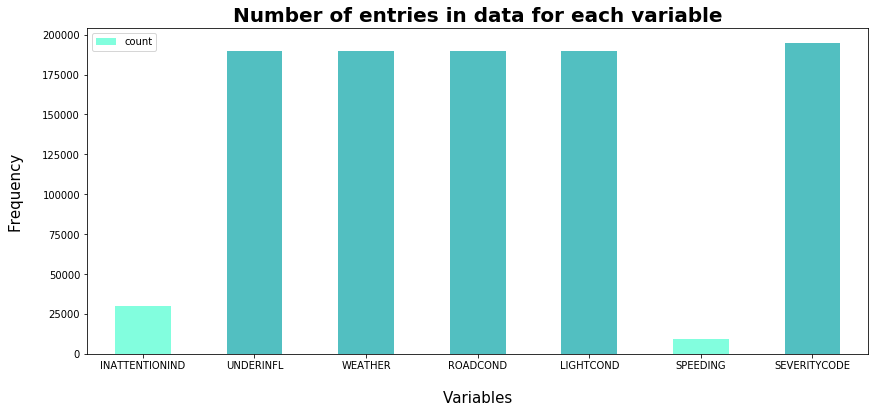

In [7]:

descriptive_stats_plot=descriptive_stats[["INATTENTIONIND","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND","SPEEDING","SEVERITYCODE"]]
descriptive_stats_plot.drop(['unique','top','freq','mean','std','min','max','25%','50%','75%'],axis=0,inplace=True)
descriptive_stats_plot=descriptive_stats_plot.transpose()

color_yo=['#4dfed1','#08a4a7','#08a4a7','#08a4a7','#08a4a7','#4dfed1','#08a4a7']
descriptive_stats_plot.plot(kind='bar',alpha=0.70,color=[color_yo],figsize=(14,6))
plt.title('Number of entries in data for each variable', fontsize=20, fontweight='bold')
plt.xlabel("Variables",fontsize=15,labelpad=20)
plt.ylabel("Frequency",fontsize=15,labelpad=20)
plt.xticks(rotation=360)
plt.show()

Now, we set values for the featutre set because most of our features have string/object as therir datatype. For a better model, it is a great practice tomclean data dropping off irrelevant values or replacing them with some values.

In [8]:
#INATTENTIONID
df["INATTENTIONIND"].replace("Y", 1, inplace=True)
df["INATTENTIONIND"].replace("N", 0, inplace=True)
df["INATTENTIONIND"].replace(np.nan, 0, inplace=True)

#UNDERINFL
df['UNDERINFL'].replace("Y",1,inplace=True)
df['UNDERINFL'].replace("N",0,inplace=True)
df['UNDERINFL'].replace(np.nan,0,inplace=True)

#SPEEDING
df["SPEEDING"].replace("Y",1,inplace=True)
df["SPEEDING"].replace("N",0,inplace=True)
df["SPEEDING"].replace(np.nan,0,inplace=True)

#LIGHTCOND
df["LIGHTCOND"].replace("Daylight", 0, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights On", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - No Street Lights", 2, inplace=True)
df["LIGHTCOND"].replace("Dusk", 1, inplace=True)
df["LIGHTCOND"].replace("Dawn", 1, inplace=True)
df["LIGHTCOND"].replace("Dark - Street Lights Off", 2, inplace=True)
df["LIGHTCOND"].replace("Dark - Unknown Lighting", 2, inplace=True)
df["LIGHTCOND"].replace("Other","Unknown", inplace=True)

#WEATHER
df["WEATHER"].replace("Clear", 0, inplace=True)
df["WEATHER"].replace("Raining", 3, inplace=True)
df["WEATHER"].replace("Overcast", 1, inplace=True)
df["WEATHER"].replace("Other", "Unknown", inplace=True)
df["WEATHER"].replace("Snowing", 3, inplace=True)
df["WEATHER"].replace("Fog/Smog/Smoke", 2, inplace=True)
df["WEATHER"].replace("Sleet/Hail/Freezing Rain", 3, inplace=True)
df["WEATHER"].replace("Blowing Sand/Dirt", 2, inplace=True)
df["WEATHER"].replace("Severe Crosswind", 2, inplace=True)
df["WEATHER"].replace("Partly Cloudy", 1, inplace=True)

#ROADCOND
df["ROADCOND"].replace("Dry", 0, inplace=True)
df["ROADCOND"].replace("Wet", 2, inplace=True)
df["ROADCOND"].replace("Ice", 2, inplace=True)
df["ROADCOND"].replace("Snow/Slush", 1, inplace=True)
df["ROADCOND"].replace("Other", "Unknown", inplace=True)
df["ROADCOND"].replace("Standing Water", 2, inplace=True)
df["ROADCOND"].replace("Sand/Mud/Dirt", 1, inplace=True)
df["ROADCOND"].replace("Oil", 2, inplace=True)


Now, we create a dataframe containing all these features that are going to be used,unique id for the incident and it's longitude and latitude.

In [9]:
feature_df=df[['X','Y','INCKEY','INATTENTIONIND','UNDERINFL','SPEEDING','LIGHTCOND','WEATHER','ROADCOND','SEVERITYCODE']]
feature_df.dropna(axis=0,inplace=True)
feature_df.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,SPEEDING,LIGHTCOND,WEATHER,ROADCOND,SEVERITYCODE
0,-122.323148,47.703140,1307,0.0,0,0.0,0,1,2,1
1,-122.347294,47.647172,52200,0.0,0,0.0,1,3,2,0
2,-122.334540,47.607871,26700,0.0,0,0.0,0,1,0,0
3,-122.334803,47.604803,1144,0.0,0,0.0,0,0,0,0
4,-122.306426,47.545739,17700,0.0,0,0.0,0,3,2,1


In [10]:
feature_stats=feature_df.describe()
feature_stats

,X,Y,INCKEY,INATTENTIONIND,SPEEDING,SEVERITYCODE
count,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000
mean,-122.330502,47.619544,138384.461586,0.158003,0.047278,0.304142
std,0.030018,0.056215,85503.159003,0.364745,0.212233,0.460045
min,-122.419091,47.495573,1001.000000,0.000000,0.000000,0.000000
25%,-122.348846,47.575884,68873.500000,0.000000,0.000000,0.000000
50%,-122.330168,47.615361,120488.000000,0.000000,0.000000,0.000000
75%,-122.311922,47.663835,199259.000000,0.000000,0.000000,1.000000
max,-122.238949,47.734142,331342.000000,1.000000,1.000000,1.000000


As we see above, only X,Y,INCKEY,INATTENTIND,SPEEDING and SEVERITYCODE are displayed when the describe() function is called. This shows that the other data is still object/string type. So we need to explicitly convert ach of these attributes' datatypes to int. There are also some unknown and other values that we have to replace. We'll do all of this here. Also, some of these are read as float instead of int wasting memory, so we'll convert them as well to int

In [11]:
feature_df.dtypes

X                 float64
Y                 float64
INCKEY              int64
INATTENTIONIND    float64
UNDERINFL          object
SPEEDING          float64
LIGHTCOND          object
WEATHER            object
ROADCOND           object
SEVERITYCODE        int64
dtype: object

In [12]:
    #Light Condition
lightcondsize = feature_df ["LIGHTCOND"].size

featureinlightcond = feature_df ['LIGHTCOND'] == 'Unknown'

lightcond = feature_df['LIGHTCOND']
lightcond = lightcond.values
lightcond = lightcond[featureinlightcond]

lightcond[0:9036]=0
lightcond[9036:13417]=1
lightcond[13417:13961]=2

feature_df.loc [feature_df.LIGHTCOND == "Unknown", 'LIGHTCOND'] = lightcond

feature_df["LIGHTCOND"]=feature_df["LIGHTCOND"].astype(int)

    #Road Condition
roadcondsize = feature_df ["ROADCOND"].size

featureinroadcond = feature_df ['ROADCOND'] == 'Unknown'

roadcond = feature_df['LIGHTCOND']
roadcond = roadcond.values
roadcond = roadcond[featureinroadcond]

roadcond[0:9954]=0
roadcond[9954:10040]=1
roadcond[10040:15163]=2

feature_df.loc[feature_df.ROADCOND == "Unknown", 'ROADCOND'] = roadcond
feature_df["ROADCOND"]=feature_df["ROADCOND"].astype(int)

    #Weather Condition
weathersize = feature_df ["WEATHER"].size

featureinweather = feature_df ['WEATHER'] == 'Unknown'

weather = feature_df['WEATHER']
weather = weather.values
weather = weather[featureinweather]

weather[0:10151]=0
weather[10151:12683]=1
weather[12683:12742]=2
weather[12742:15864]=3

feature_df.loc[feature_df.WEATHER == "Unknown", 'WEATHER'] = weather
feature_df["WEATHER"]=feature_df["WEATHER"].astype(int)

    #Converting remaining to int
feature_df["SPEEDING"]=feature_df["SPEEDING"].astype(int)
feature_df["INATTENTIONIND"]=feature_df["INATTENTIONIND"].astype(int)
feature_df["UNDERINFL"]=feature_df["UNDERINFL"].astype(int)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pan

In [13]:
feature_stats=feature_df.describe()
feature_stats

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,SPEEDING,LIGHTCOND,WEATHER,ROADCOND,SEVERITYCODE
count,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000,184167.000000
mean,-122.330502,47.619544,138384.461586,0.158003,0.048103,0.047278,0.348678,0.736180,0.562267,0.304142
std,0.030018,0.056215,85503.159003,0.364745,0.213985,0.212233,0.505375,1.156392,0.895680,0.460045
min,-122.419091,47.495573,1001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-122.348846,47.575884,68873.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-122.330168,47.615361,120488.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-122.311922,47.663835,199259.000000,0.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000
max,-122.238949,47.734142,331342.000000,1.000000,1.000000,1.000000,2.000000,3.000000,2.000000,1.000000


Finally, we have our feature set ready to be used. Let's define the Independent(y) and Dependent(X) variables.

In [14]:
X=feature_df[["SPEEDING","INATTENTIONIND","UNDERINFL","ROADCOND","WEATHER","LIGHTCOND"]].values
y=feature_df[["SEVERITYCODE"]].values

In [15]:
feature_df.head()

,X,Y,INCKEY,INATTENTIONIND,UNDERINFL,SPEEDING,LIGHTCOND,WEATHER,ROADCOND,SEVERITYCODE
0,-122.323148,47.703140,1307,0,0,0,0,1,2,1
1,-122.347294,47.647172,52200,0,0,0,1,3,2,0
2,-122.334540,47.607871,26700,0,0,0,0,1,0,0
3,-122.334803,47.604803,1144,0,0,0,0,0,0,0
4,-122.306426,47.545739,17700,0,0,0,0,3,2,1


<h3>Model Training

In [16]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[-0.2227641 , -0.43318952, -0.2247975 ,  1.60519116,  0.22814146,
        -0.6899418 ],
       [-0.2227641 , -0.43318952, -0.2247975 ,  1.60519116,  1.9576629 ,
         1.28879387],
       [-0.2227641 , -0.43318952, -0.2247975 , -0.62775612,  0.22814146,
        -0.6899418 ],
       [-0.2227641 , -0.43318952, -0.2247975 , -0.62775612, -0.63661925,
        -0.6899418 ],
       [-0.2227641 , -0.43318952, -0.2247975 ,  1.60519116,  1.9576629 ,
        -0.6899418 ]])

We begin Model Training by splitting the data for training and testing using the train_test_split() function

In [17]:
#Test/Train split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (128916, 6) (128916, 1)
Test set: (55251, 6) (55251, 1)


<h5>Decision Tree 

In [18]:
DT=DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DT.fit(X_train,y_train)
yhat_DT=DT.predict(X_test)

In [19]:
print('Accuracy score for Decision Tree = ', accuracy_score(yhat_DT, y_test))

Accuracy score for Decision Tree =  0.6960055021628567


Predicted      0   1    All
True                       
0          38421  24  38445
1          16772  34  16806
All        55193  58  55251
              precision    recall  f1-score   support

           0       1.00      0.70      0.82     55193
           1       0.00      0.59      0.00        58

   micro avg       0.70      0.70      0.70     55251
   macro avg       0.50      0.64      0.41     55251
weighted avg       1.00      0.70      0.82     55251

Confusion matrix, without normalization
[[   34 16772]
 [   24 38421]]


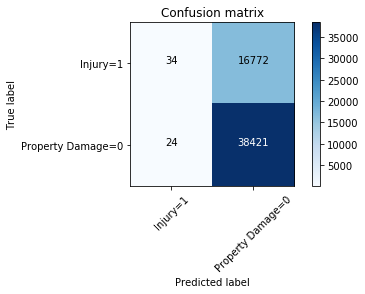

In [20]:
#Confusion Matrix - Decision Tree
print(pd.crosstab(y_test.ravel(), yhat_DT.ravel(), rownames = ['True'], colnames = ['Predicted'], margins = True))

print(classification_report(yhat_DT,y_test))

from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    #Plot it
cnf_matrix = confusion_matrix(y_test, yhat_DT, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [21]:
#Evaluation Metrics
print("F1 score:%.4f"%f1_score(yhat_DT,y_test,average='weighted'))
print("Jaccard Similarity Score:%.4f"%jaccard_similarity_score(yhat_DT,y_test))

F1 score:0.8198
Jaccard Similarity Score:0.6960


<h5>Logistic Regression

In [22]:
LR=LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train,y_train)
yhat_LR=LR.predict(X_test)
yhat_prob=LR.predict_proba(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/utils/validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
print(log_loss(y_test, yhat_prob))
print ("Accuracy", accuracy_score(yhat_LR,y_test))

0.610842837890557
Accuracy 0.6956073193245371


              precision    recall  f1-score   support

           0       0.70      1.00      0.82     38445
           1       0.25      0.00      0.00     16806

   micro avg       0.70      0.70      0.70     55251
   macro avg       0.47      0.50      0.41     55251
weighted avg       0.56      0.70      0.57     55251

Confusion matrix, without normalization
[[    6 16800]
 [   18 38427]]


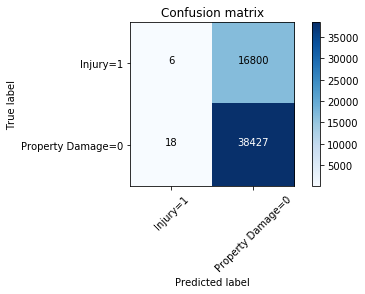

In [24]:
print (classification_report(y_test, yhat_LR))
cnf_matrix = confusion_matrix(y_test, yhat_LR, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [25]:
#Evaluation Metrics
print("F1 score:%.4f"%f1_score(yhat_LR,y_test,average='weighted'))
print("Jaccard Similarity Score:%.4f"%jaccard_similarity_score(yhat_LR,y_test))
print("Log loss:%.4f"%log_loss(y_test,yhat_prob))

F1 score:0.8201
Jaccard Similarity Score:0.6956
Log loss:0.6108


<h5>
    KNN

In [26]:
k=8
neigh=KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

yhat_knn = neigh.predict(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


In [27]:
print ("Accuracy", accuracy_score(yhat_LR,y_test))

Accuracy 0.6956073193245371


              precision    recall  f1-score   support

           0       0.70      0.97      0.81     38445
           1       0.37      0.04      0.07     16806

   micro avg       0.69      0.69      0.69     55251
   macro avg       0.54      0.51      0.44     55251
weighted avg       0.60      0.69      0.59     55251

Confusion matrix, without normalization
[[  669 16137]
 [ 1129 37316]]


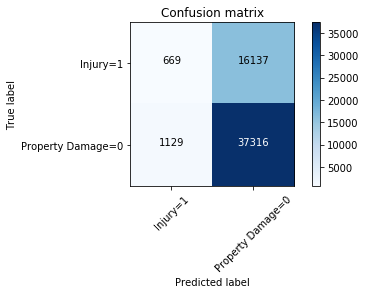

In [28]:
print (classification_report(y_test, yhat_knn))

cnf_matrix = confusion_matrix(y_test, yhat_knn, labels=[1,0])
np.set_printoptions(precision=2)


        # Plot confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Injury=1','Property Damage=0'],normalize= False,  title='Confusion matrix')

In [29]:
#Evaluation Metrics
print("F1 score:%.4f"%f1_score(yhat_knn,y_test,average='weighted'))
print("Jaccard Similarity Score:%.4f"%jaccard_similarity_score(yhat_knn,y_test))

F1 score:0.7880
Jaccard Similarity Score:0.6875
